# Bike Sharing Problem
### Name : Shaban Khan

#### Let's load and analyse the data.

In [581]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [582]:
pd.set_option('display.expand_frame_repr', False)

In [583]:
df = pd.read_csv("day.csv")

In [584]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [585]:
df.shape

(730, 16)

In [586]:
df = df.drop(["instant", "dteday", "atemp", "casual", "registered"], axis=1)

In [587]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [588]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.8 KB


#### Let's convert the coded values in the dataset into the actual values. Doing so, in the 'seasons' column we will get 'Spring' in place of '1'. We are going to perform this for all the coded columns. We are doing this so that when we apply get_dummies() on these columns later, we get columns that are properly labelled .  

In [589]:
def weekdays(n):
    if n == 0:
        return "Sunday"
    elif n == 1:
        return "Monday"
    elif n == 2:
        return "Tuesday"
    elif n == 3:
        return "Wednesday"
    elif n == 4:
        return "Thursday"
    elif n == 5:
        return "Friday"
    else: 
        return "Saturday"
        
df['weekday'] = df['weekday'].apply(lambda x: weekdays(x))    

In [590]:
def seasons(n):
    if n == 1:
        return 'Spring'
    elif n == 2:
        return 'Summer'
    elif n == 3:
        return 'Fall'
    else: 
        return 'Winter'
    
df['season'] = df['season'].apply(lambda x: seasons(x))  

In [591]:
def weathersit(n):
    if n == 1:
        return 'Clear'
    elif n == 2:
        return 'Cloudy'
    elif n == 3:
        return 'Light_rain_snow'
    else: 
        return 'Thunderstorm'
    
df['weathersit'] = df['weathersit'].apply(lambda x: weathersit(x))  

In [592]:
def months(n):
    if n == 1:
        return 'Jan'
    elif n == 2:
        return 'Feb'
    elif n == 3:
        return 'Mar'
    elif n == 4:
        return 'Apr'
    elif n == 5:
        return 'May'
    elif n == 6:
        return 'Jun'
    elif n == 7:
        return 'Jul'
    elif n == 8:
        return 'Aug'
    elif n == 9:
        return 'Sep'
    elif n == 10:
        return 'Oct'
    elif n == 11:
        return 'Nov'
    else:
        return 'Dec'
df['mnth'] = df['mnth'].apply(lambda x: months(x))  

In [593]:
num_variables = ['temp','hum', 'windspeed', 'cnt']

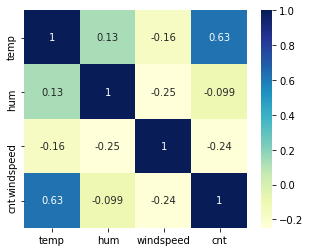

In [594]:
plt.figure(figsize = (5, 4))
sns.heatmap(df[num_variables].corr(), annot = True, cmap="YlGnBu")
plt.show()

<Figure size 432x432 with 0 Axes>

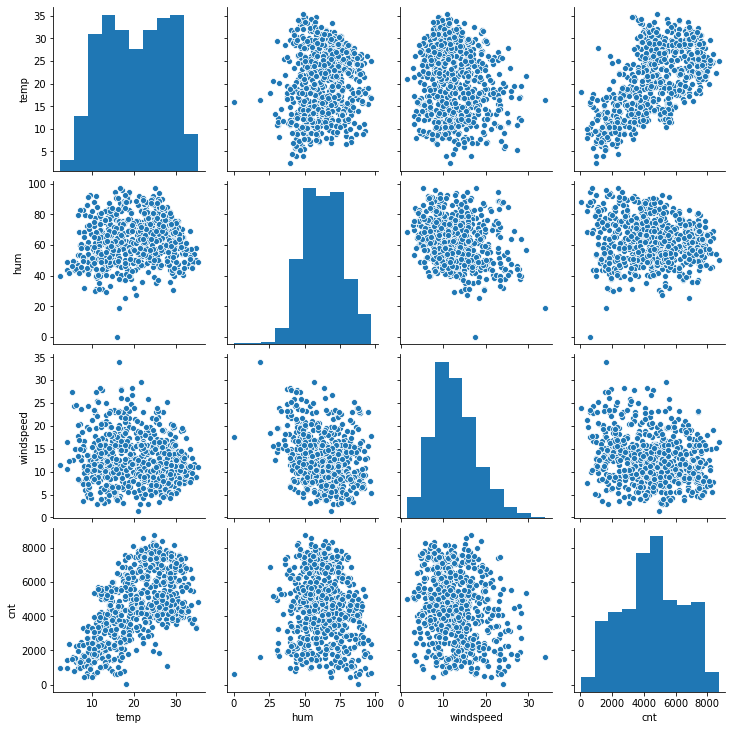

In [595]:
plt.figure(figsize = (6, 6))
sns.pairplot(df[num_variables])
plt.show()

#### Observation: Temperature is highly correlated to the counts of bike hire.

#### Visualizing categorical variables.

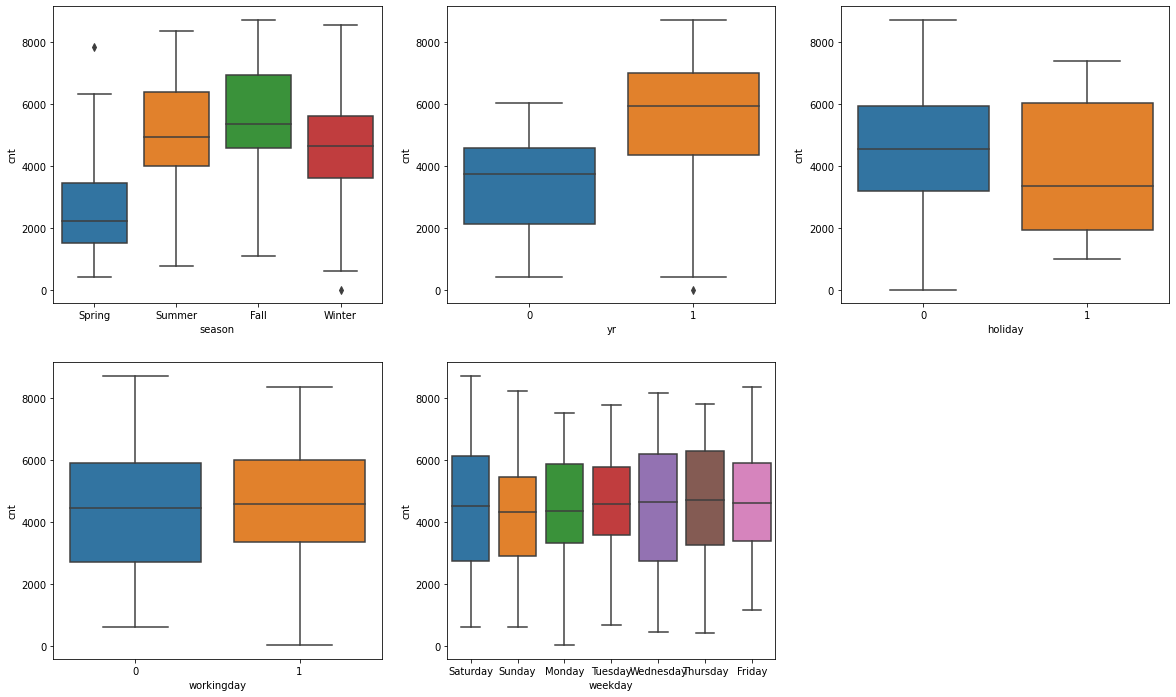

In [596]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.show()

#### Observations:
    1. Summer and Fall seasons attract highest numbers of bike hires.
    2. According to the data, number of bike hires has increased with year.

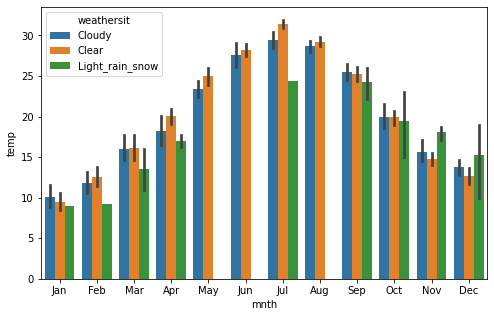

In [597]:
plt.figure(figsize=(8, 5))
sns.barplot(data= df, x='mnth', y='temp', hue='weathersit')
plt.show()

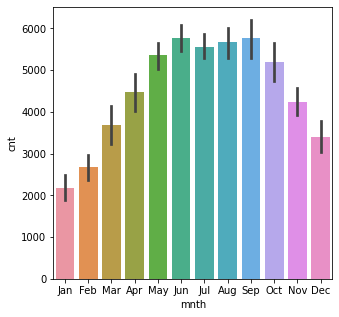

In [598]:
plt.figure(figsize=(5, 5))
sns.barplot(data= df, x='mnth', y='cnt')
plt.show()

#### Observations: 
1. Number of bike hires are high from May to September. This could be because the weather is mostly clear and there is less rain/snow during these months.
2. High temperature during the months from May to Septenber results in higher bike hires than the rest of the year. We have already seen that temperature has high correlation with number of bike hire counts. 

### Dummy Variables

#### In order to proceed with the analysis we need to convert our categorical variables into dummy variables.

In [599]:
seasons = pd.get_dummies(df['season'], drop_first = True)

month = pd.get_dummies(df['mnth'], drop_first=True)

weather_situation = pd.get_dummies(df['weathersit'], drop_first=True)

weekdays = pd.get_dummies(df['weekday'], drop_first=True)

#### Now let's concatenate these into our main dataframe.

In [600]:
df = pd.concat([df, seasons], axis = 1)

df = pd.concat([df, month], axis=1)

df = pd.concat([df, weather_situation], axis=1)

df = pd.concat([df, weekdays], axis=1)

In [601]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt', 'Spring', 'Summer',
       'Winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov',
       'Oct', 'Sep', 'Cloudy', 'Light_rain_snow', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

#### Let's delete categorical variable columns that have been converted into dummy variables. We dont need them now.

In [602]:
df = df.drop(["season", "weathersit", "mnth", "weekday"], axis=1)

In [603]:
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,Oct,Sep,Cloudy,Light_rain_snow,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,1,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,1


### Splitting Data into test and train sets

In [604]:
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [605]:
df_test.shape

(219, 29)

In [606]:
df_train.shape

(510, 29)

#### The data has been divided into train and test sets in 7:3 ratio.

### Standardization

In [607]:
scaler = MinMaxScaler()

In [608]:
df_train[num_variables] = scaler.fit_transform(df_train[num_variables])

In [609]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,Oct,Sep,Cloudy,Light_rain_snow,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,1,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,1,0,0,1,0,0,0,0


In [610]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,Oct,Sep,Cloudy,Light_rain_snow,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.343137,0.029412,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.475223,0.169124,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### The data has been cleaned and standardized. Now we can start building the model.

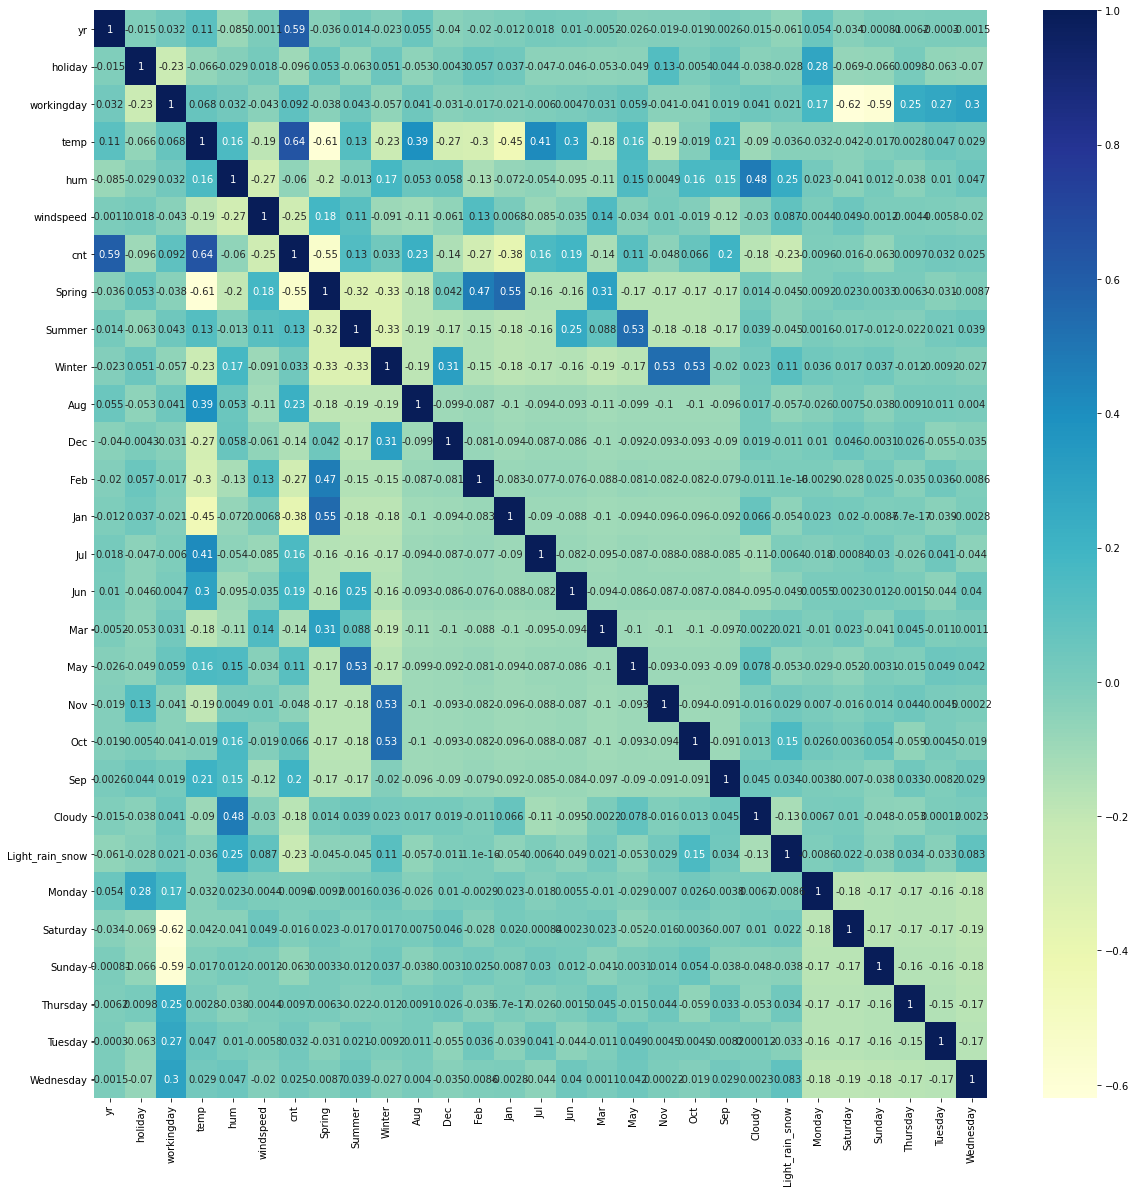

In [611]:
plt.figure(figsize = (20, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Observation: There are several variables that seem to be correlated with 'cnt'. Also, there are some independent variables that are correlated to each other.

### Model Building with RFE
#### Since there are 29 variables in the dataset, we will use RFE from Sk-learn for initial elimination of features that are less useful.

#### Dividing X and Y sets.

In [612]:
y_train = df_train.pop('cnt')
X_train = df_train

#### Now we will use RFE to keep 15 features out of 29 features.

In [613]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [614]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('Jul', True, 1),
 ('Jun', False, 13),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', False, 3),
 ('Oct', False, 10),
 ('Sep', True, 1),
 ('Cloudy', True, 1),
 ('Light_rain_snow', True, 1),
 ('Monday', False, 8),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 11),
 ('Tuesday', False, 9),
 ('Wednesday', False, 12)]

In [615]:
col = X_train.columns[rfe.support_]
print("Features selected by RFE are: ", col)

Features selected by RFE are:  Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Summer', 'Winter', 'Jul', 'Sep', 'Cloudy', 'Light_rain_snow',
       'Saturday', 'Sunday'],
      dtype='object')


In [616]:
print("Features dropped by RFE are: " , X_train.columns[~rfe.support_])

Features dropped by RFE are:  Index(['Aug', 'Dec', 'Feb', 'Jan', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Monday',
       'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')


#### Now that we have our top 15 features, we will now use Statsmodel to fine tune our model manually.

In [617]:
X_train_lm = X_train[col]

In [618]:
X_train_lm.head()

,yr,holiday,workingday,temp,hum,windspeed,Spring,Summer,Winter,Jul,Sep,Cloudy,Light_rain_snow,Saturday,Sunday
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,1,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,1
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,1,0,1,0


In [619]:
# Add a constant
X_train_lm = sm.add_constant(X_train_lm)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm).fit()

In [620]:
lr1.params

const              0.198900
yr                 0.229738
holiday           -0.018955
workingday         0.083695
temp               0.527819
hum               -0.159467
windspeed         -0.180601
Spring            -0.055434
Summer             0.052613
Winter             0.100294
Jul               -0.054881
Sep                0.081773
Cloudy            -0.057847
Light_rain_snow   -0.246332
Saturday           0.093682
Sunday             0.040479
dtype: float64

#### Printing model summary nd VIF values.

In [621]:
print("Model lr1 Summary")
print(lr1.summary())


vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print("\n VIF Values")
print(vif)

Model lr1 Summary
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          1.13e-191
Time:                        10:39:36   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.19

#### As we can see above that 'holiday' has a p-value of 0.373 which is much higher than the ideal limit. So we will go ahead and drop this feature and rebuild the model.       

In [622]:
X = X_train_lm.drop('holiday', 1,)

X_train_lm = sm.add_constant(X)

lr2 = sm.OLS(y_train, X_train_lm).fit()

print("Model lr2 Summary:")
print(lr2.summary())

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(" \n VIF Values")
print(vif)

Model lr2 Summary:
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          1.13e-191
Time:                        10:39:36   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1

#### In the above model, feature 'workingday' has a VIF value of 9.07 which is way higher than the acceptable threshold. Hence we will drop this feature in the next step and rebuild the model.

In [623]:
X = X_train_lm.drop('workingday', 1,)

X_train_lm = sm.add_constant(X)

lr3 = sm.OLS(y_train, X_train_lm).fit()

print("Model lr3 Summary:")

print(lr3.summary())

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(" \n VIF Values")
print(vif)

Model lr3 Summary:
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.8
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          2.36e-189
Time:                        10:39:36   Log-Likelihood:                 509.56
No. Observations:                 510   AIC:                            -991.1
Df Residuals:                     496   BIC:                            -931.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2

#### In the above model the VIF values of all the features are fine but 'Saturday' has a high p-value. Let's go ahead and drop this feature and see how it affects our model.

In [624]:
X = X_train_lm.drop('Saturday', 1,)

X_train_lm = sm.add_constant(X)

lr4 = sm.OLS(y_train, X_train_lm).fit()
print("Model lr4 Summary")
print(lr4.summary())

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(" \n VIF Values")
print(vif)

Model lr4 Summary
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.5
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          3.31e-190
Time:                        10:39:36   Log-Likelihood:                 508.78
No. Observations:                 510   AIC:                            -991.6
Df Residuals:                     497   BIC:                            -936.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.28

#### The above model 'lr4' looks good as it has features that have acceptable p-values and VIF values. Adj. R-Squared of this model is also 0.83 which is a good sign. But still we have way too many features in the model. Lets drop 'Spring' as it has the highest VIF value and see how it affects the model.

In [625]:
X = X_train_lm.drop('Spring', 1,)

X_train_lm = sm.add_constant(X)

lr5 = sm.OLS(y_train, X_train_lm).fit()
print("Model lr5 Summary")
print(lr5.summary())

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(" \n VIF Values")
print(vif)

Model lr5 Summary
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     236.6
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          9.40e-190
Time:                        10:39:36   Log-Likelihood:                 504.87
No. Observations:                 510   AIC:                            -985.7
Df Residuals:                     498   BIC:                            -934.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.22

#### The above model has an adjusted R-Squared of 0.83 which sits in an accptable range, but lets see if we can drop more variables and make our model simpler without compromising on the accuracy. Next best contender fit for dropping is 'Jul' which has a p-value of 0.016. Even though this p-value falls in an acceptable range but we want to see if dropping this will affect our model or not.

In [626]:
X = X_train_lm.drop('Jul', 1,)

X_train_lm = sm.add_constant(X)

lr6 = sm.OLS(y_train, X_train_lm).fit()
print("Model lr6 Summary")
print(lr6.summary())

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(" \n VIF Values")
print(vif)

Model lr6 Summary
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     257.2
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          1.04e-189
Time:                        10:39:37   Log-Likelihood:                 501.89
No. Observations:                 510   AIC:                            -981.8
Df Residuals:                     499   BIC:                            -935.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.22

#### Let's go one step further and drop 'hum' as well and see how it affects the adjusted R-squared.

In [627]:
X = X_train_lm.drop('hum', 1,)

X_train_lm = sm.add_constant(X)

lr7 = sm.OLS(y_train, X_train_lm).fit()
print("Model lr7 Summary")
print(lr7.summary())

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(" \n VIF Values")
print(vif)

Model lr7 Summary
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     273.7
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          7.01e-187
Time:                        10:39:37   Log-Likelihood:                 492.30
No. Observations:                 510   AIC:                            -964.6
Df Residuals:                     500   BIC:                            -922.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.12

#### Now our model has only 9 features. This is the simplest the model can get and dropping more features will reduce the accuracy considerably. The adjusted R-squared of this model is approximaltely 0.83 which falls in an acceptable range. This is our final model.

### Residual Analysis

In [628]:
y_train_cnt = lr7.predict(X_train_lm)

Text(0.5, 0, 'Errors')

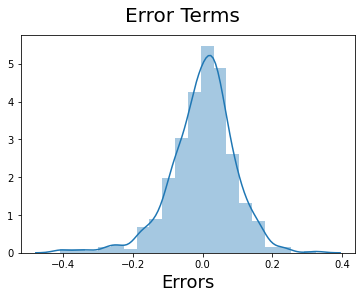

In [629]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Errors are normally distributed. This is a sign of a good model. Now let's predict with the same model.

### Predicting

#### Scaling the test sets

In [630]:
df_test[num_variables] = scaler.transform(df_test[num_variables])

In [631]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,Oct,Sep,Cloudy,Light_rain_snow,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.319635,0.027397,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.467403,0.163612,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing X and Y in test sets

In [632]:
y_test = df_test.pop('cnt')
X_test = df_test

In [633]:
X_test = X_test[col]

In [634]:
X_test_lr7 = sm.add_constant(X_test)

#### Dropping non required variables in test set.

In [635]:
X_test_lr7 = X_test_lr7.drop(['holiday', 'workingday', 'Saturday', 'Spring', 'Jul', 'hum'], axis=1)

In [636]:
X_test_lr7.head()

,const,yr,temp,windspeed,Summer,Winter,Sep,Cloudy,Light_rain_snow,Sunday
184,1.0,0,0.831783,0.084219,0,0,0,1,0,0
535,1.0,1,0.901354,0.153728,1,0,0,0,0,0
299,1.0,0,0.511964,0.334206,0,1,0,1,0,0
221,1.0,0,0.881625,0.339570,0,0,0,0,0,0
152,1.0,0,0.817246,0.537414,1,0,0,0,0,0


In [637]:
# Making predictions using the final model

y_pred_lr7 = lr7.predict(X_test_lr7)

### Model Evaluation

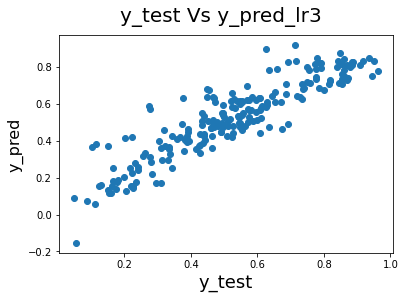

In [638]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_lr4)
fig.suptitle('y_test Vs y_pred_lr3', fontsize = 20)          
plt.xlabel('y_test', fontsize = 18)                        
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

#### Now let's calculate r2

In [639]:
print("R2 Score of model lr7 is :",r2_score(y_true=y_test, y_pred=y_pred_lr7))

R2 Score of model lr7 is : 0.7920853840435127


#### Observations:

1. The counts of hiring are increasing every year.
2. Wind speed, cloudy weather and light rain/snow are negatively correlated to hire counts.
3. Temperature and summer are positively correlated to the hire counts. 

#### Recommendations:
1. The company must take appropriate steps to tackle low demand during cloudy weather and light rain/snow. A simple addition like a raincoat in bad weather can do the trick.

2. Clearly high tempratures in summer work immensely in favour of the company and they must take advantage of this by introducing marketing campaigns that help increasing hiring counts as well as registered users.

3. A marketing plan to improve the counts of certain days of the week such as Sundays is also needed.